In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.io as sio
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = sio.loadmat('mnist_10digits.mat')
X_train = data['xtrain']/255
y_train = data['ytrain'][0]
X_test = data['xtest']/255
y_test = data['ytest'][0]

In [3]:
X_test.shape

(10000, 784)

* Compare KNN, LR, SVM, kernel SVM, and neural net 
* Use downsampled data set for KNN and SVM (m = 5000) for improved computation efficiency
* Report confusion matrix, precision, recall, and F1 score for each classifier
* Precision$= \frac{TP}{TP + FP}$
* Recall$= \frac{TP}{TP + FN}$
* F1 score$= \frac{2}{precision^{-1}+recall^{-1}}$

In [4]:
# Downsample training data to m = 5000
samples = random.sample(range(X_train.shape[0]), 5000)
X_train_5k, y_train_5k = X_train[samples,:], y_train[samples]

In [5]:
y_train_5k

array([3, 4, 3, ..., 5, 7, 2], dtype=int64)

In [6]:
# KNN
# Test run
KNN = KNeighborsClassifier(5).fit(X_train_5k,y_train_5k)
KNN_score = KNN.score(X_test,y_test)

In [7]:
KNN_score

0.9379

1
2
3
4
5
6
7
8
9
10


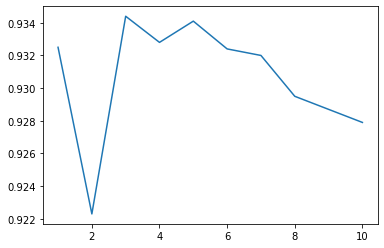

In [12]:
# Downsample training data to m = 5000
samples = random.sample(range(X_train.shape[0]), 5000)
X_train_5k, y_train_5k = X_train[samples,:], y_train[samples]
# Find best number of neighbors
scores = []
for k in range(1,11):
    print(k)
    score = KNeighborsClassifier(k).fit(X_train_5k,y_train_5k).score(X_test,y_test)
    scores.append(score)
plt.plot(range(1,11), scores) # Looks like k=3 is the best

In [13]:
KNN = KNeighborsClassifier(3).fit(X_train_5k,y_train_5k)
confusion_matrix(y_test,KNN.predict(X_test))

array([[ 967,    1,    1,    0,    0,    3,    7,    1,    0,    0],
       [   0, 1130,    2,    1,    0,    0,    2,    0,    0,    0],
       [  26,   32,  937,    8,    1,    0,    4,   21,    3,    0],
       [   2,    6,    8,  953,    1,   18,    1,    7,    8,    6],
       [   2,   22,    1,    0,  889,    0,    7,    2,    0,   59],
       [   8,   10,    1,   37,    3,  803,    9,    3,    8,   10],
       [  10,    5,    0,    1,    3,    3,  935,    0,    1,    0],
       [   0,   39,    7,    0,    6,    0,    0,  948,    0,   28],
       [  12,   10,   13,   26,   11,   35,    2,   12,  843,   10],
       [  13,    6,    4,    9,   16,    4,    1,   16,    1,  939]],
      dtype=int64)

In [75]:
print(classification_report(y_test,KNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.90      1.00      0.94      1135
           2       0.96      0.91      0.93      1032
           3       0.92      0.94      0.93      1010
           4       0.96      0.91      0.93       982
           5       0.93      0.90      0.91       892
           6       0.97      0.98      0.97       958
           7       0.94      0.92      0.93      1028
           8       0.98      0.87      0.92       974
           9       0.89      0.93      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000



In [15]:
# Linear SVM
# Test run
lSVM = SVC(kernel='linear', C=0.025).fit(X_train_5k,y_train_5k)
lSVM_score = lSVM.score(X_test,y_test)

In [52]:
confusion_matrix(y_test, lSVM.predict(X_test))

array([[ 963,    0,    3,    1,    0,    3,    6,    1,    3,    0],
       [   0, 1116,    1,    3,    1,    3,    3,    0,    8,    0],
       [  10,    4,  944,   18,   15,    0,    9,   13,   17,    2],
       [   1,    2,   15,  927,    1,   27,    3,   11,   17,    6],
       [   1,    2,   10,    1,  908,    2,    9,    1,    2,   46],
       [   8,    9,    7,   51,    7,  767,   16,    4,   18,    5],
       [   9,    3,    6,    0,    5,   11,  919,    2,    3,    0],
       [   2,   13,   20,    4,    8,    2,    0,  943,    6,   30],
       [   8,    9,   14,   29,    7,   32,   10,    6,  847,   12],
       [  12,    4,    3,   12,   38,    6,    1,   23,    8,  902]],
      dtype=int64)

In [53]:
print(classification_report(y_test, lSVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.91      0.92      1032
           3       0.89      0.92      0.90      1010
           4       0.92      0.92      0.92       982
           5       0.90      0.86      0.88       892
           6       0.94      0.96      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.91      0.87      0.89       974
           9       0.90      0.89      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [41]:
np.logspace(-4, 1, 10)

array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01])

0.01
0.011364636663857248
0.01291549665014884
0.014677992676220698
0.016681005372000592
0.018957356524063752
0.021544346900318832
0.024484367468222266
0.027825594022071243
0.03162277660168379


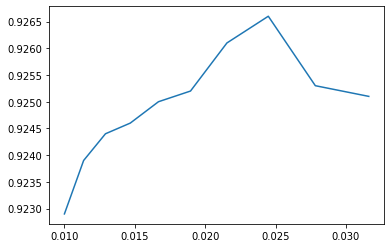

In [49]:
# Downsample training data to m = 5000
samples = random.sample(range(X_train.shape[0]), 5000)
X_train_5k, y_train_5k = X_train[samples,:], y_train[samples]
# Find best value of C
C = np.logspace(-2, -1.5, 10)
scores = []
for i in C:
    print(i)
    score = SVC(kernel='linear', C=i).fit(X_train_5k,y_train_5k).score(X_test,y_test)
    scores.append(score)
plt.plot(C, scores) # Best value: C = 0.025

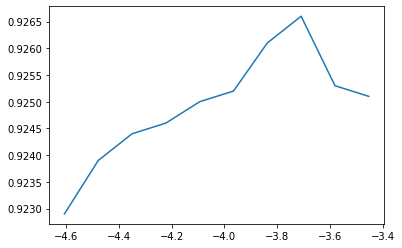

In [50]:
plt.plot(np.log(C),scores)

In [51]:
scores

[0.9229, 0.9239, 0.9244, 0.9246, 0.925, 0.9252, 0.9261, 0.9266, 0.9253, 0.9251]

In [25]:
# Kernel SVM
# Test run
rbfSVM = SVC(gamma=2, C=1).fit(X_train_5k,y_train_5k)
rbfSVM_score = rbfSVM.score(X_test,y_test)

0
1
2
3
4
5
6
7
8
9


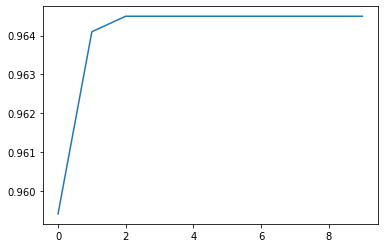

In [79]:
# Downsample training data to m = 5000
samples = random.sample(range(X_train.shape[0]), 5000)
X_train_5k, y_train_5k = X_train[samples,:], y_train[samples]
# Find best combination of gamma/C
CC, gg = np.meshgrid(np.logspace(0, 3, 10), 0.02154435)
combos = np.c_[CC.ravel(), gg.ravel()]
scores = []
for i in range(combos.shape[0]):
    print(i)
    score = SVC(gamma = combos[i,1], C = combos[i,0]).fit(X_train_5k,y_train_5k).score(X_test,y_test)
    scores.append(score)
plt.plot(range(combos.shape[0]),scores) # Best values: 

In [82]:
combos

array([[1.00000000e+00, 2.15443500e-02],
       [2.15443469e+00, 2.15443500e-02],
       [4.64158883e+00, 2.15443500e-02],
       [1.00000000e+01, 2.15443500e-02],
       [2.15443469e+01, 2.15443500e-02],
       [4.64158883e+01, 2.15443500e-02],
       [1.00000000e+02, 2.15443500e-02],
       [2.15443469e+02, 2.15443500e-02],
       [4.64158883e+02, 2.15443500e-02],
       [1.00000000e+03, 2.15443500e-02]])

In [83]:
rbfSVM = SVC(gamma=0.0215, C=10).fit(X_train_5k,y_train_5k)
confusion_matrix(y_test,rbfSVM.predict(X_test))

array([[ 970,    0,    1,    0,    0,    3,    3,    1,    2,    0],
       [   0, 1123,    3,    1,    0,    1,    3,    1,    3,    0],
       [   5,    1,  991,    7,    2,    2,    3,   10,    9,    2],
       [   0,    0,    7,  974,    0,   10,    0,    7,   10,    2],
       [   2,    0,    5,    0,  946,    0,    6,    1,    2,   20],
       [   6,    1,    3,   17,    3,  849,    6,    1,    4,    2],
       [   8,    3,    1,    0,    3,    8,  933,    0,    2,    0],
       [   0,   12,   19,    1,    7,    1,    0,  972,    3,   13],
       [   6,    0,    4,    5,    5,    8,    2,    4,  938,    2],
       [   5,    6,    2,    4,   20,    7,    1,    7,    9,  948]],
      dtype=int64)

In [84]:
print(classification_report(y_test,rbfSVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.97      0.96      0.96      1010
           4       0.96      0.96      0.96       982
           5       0.96      0.95      0.95       892
           6       0.97      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [27]:
# Logistic regression
LR = LogisticRegression(max_iter=200).fit(X_train,y_train)
confusion_matrix(y_test,LR.predict(X_test))

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[ 960,    0,    1,    2,    0,    5,    6,    3,    1,    2],
       [   0, 1112,    3,    1,    0,    1,    5,    1,   12,    0],
       [   8,    8,  920,   20,    9,    5,   10,   11,   37,    4],
       [   4,    0,   17,  919,    2,   22,    4,   12,   21,    9],
       [   1,    2,    5,    3,  914,    0,   10,    2,    7,   38],
       [  10,    2,    0,   42,   10,  769,   17,    7,   28,    7],
       [   9,    3,    7,    2,    6,   20,  907,    1,    3,    0],
       [   2,    7,   22,    5,    8,    1,    1,  950,    5,   27],
       [  10,   14,    5,   21,   14,   27,    7,   11,  853,   12],
       [   8,    8,    2,   13,   31,   14,    0,   24,   12,  897]],
      dtype=int64)

In [31]:
LR_cr = classification_report(y_test,LR.predict(X_test))

In [35]:
print(LR_cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.89      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.88      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [29]:
# Neural network
MLP = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=10000).fit(X_train,y_train)
confusion_matrix(y_test,MLP.predict(X_test))

array([[ 957,    0,    0,    2,    2,    3,    6,    5,    2,    3],
       [   0, 1112,    5,    2,    0,    2,    4,    4,    6,    0],
       [   9,    7,  981,    5,    5,    1,    5,    9,    8,    2],
       [   1,    3,    8,  955,    2,   14,    0,    7,   10,   10],
       [   0,    0,    3,    2,  931,    1,   14,    5,    4,   22],
       [  15,    1,    0,   19,    7,  817,    8,    5,   12,    8],
       [   8,    1,    9,    1,    8,    7,  918,    0,    4,    2],
       [   1,    4,   15,    7,    4,    2,    0,  979,    4,   12],
       [  11,    2,    8,   16,   12,    6,    6,    5,  901,    7],
       [   6,    3,    1,    9,   24,    4,    2,   16,    7,  937]],
      dtype=int64)

In [36]:
print(classification_report(y_test,MLP.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.94      0.95      0.94      1010
           4       0.94      0.95      0.94       982
           5       0.95      0.92      0.93       892
           6       0.95      0.96      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.94      0.93      0.93       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

